In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(r"C:\Users\KUSHAL\OneDrive\Desktop\Titanic\original_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r"C:\Users\KUSHAL\OneDrive\Desktop\Titanic\original_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
woman= train_data.loc[train_data['Sex']=='female']['Survived']
rate_woman= (sum(woman)/ len(woman))*100

print('% of woman who survived:- ', rate_woman )

% of woman who survived:-  74.20382165605095


In [7]:
man= train_data.loc[train_data['Sex']=='male']['Survived']
rate_man= (sum(man)/ len(man))*100

print('% of man who survived:- ', rate_man )

% of man who survived:-  18.890814558058924


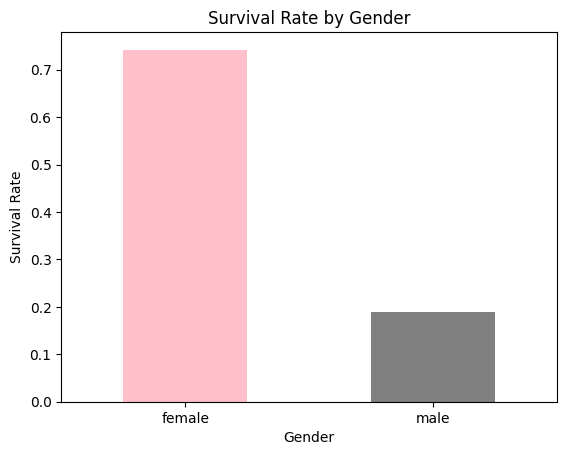

In [11]:
survival_by_gender = train_data.groupby('Sex')['Survived'].mean()

plt.figure()
survival_by_gender.plot(kind='bar', color=['pink', 'grey'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

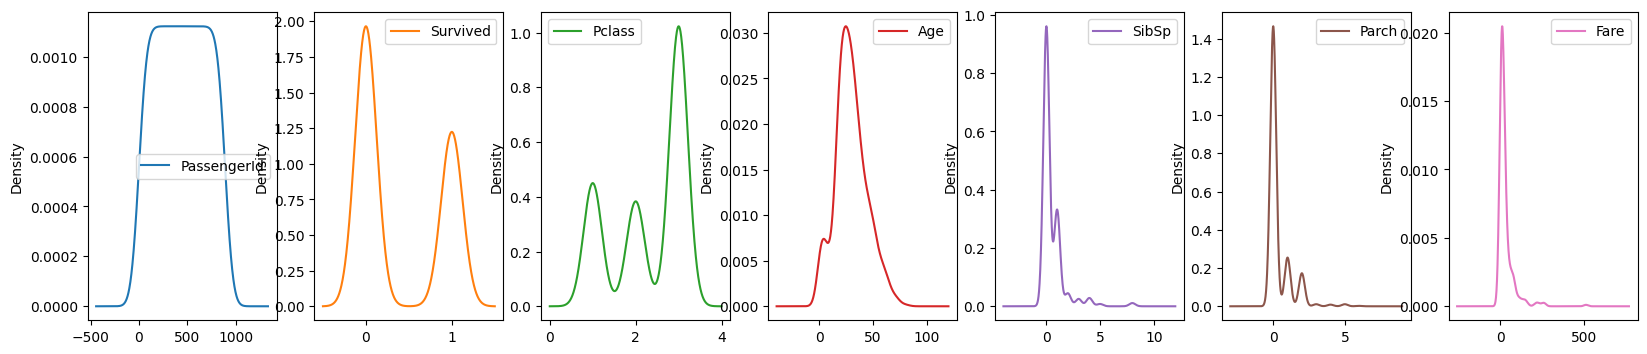

In [9]:
numeric_feature = train_data.dtypes!=object
final_numeric_feature = train_data.columns[numeric_feature].tolist()

train_data[final_numeric_feature].plot(kind='density', subplots=True, layout=(1,7), sharex=False, figsize= (20,4))
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)


import csv

def load_ground_truth_from_csv(file_path):
    ground_truth = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            ground_truth.append(float(row[0]))
    return ground_truth

def calculate_accuracy(predictions, ground_truth):
    correct = 0
    total = len(predictions)
    for pred, truth in zip(predictions, ground_truth):
        if pred == truth:
            correct += 1
    accuracy = (correct / total) * 100
    return accuracy

def main():
    predictions = model.predict(X_test)
    
    ground_truth_file = r"C:\Users\KUSHAL\OneDrive\Desktop\Titanic\gender_submission.csv" 
    ground_truth = load_ground_truth_from_csv(ground_truth_file)
    
    if len(predictions) != len(ground_truth):
        print("Error: Number of predictions doesn't match number of ground truth values.")
        return
    
    accuracy = calculate_accuracy(predictions, ground_truth)
    print("Accuracy: {:.2f}%".format(accuracy))

if __name__ == "__main__":
    main()

Accuracy: 97.13%
